In [39]:
from astropy.io import fits
from astropy import wcs
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.modeling import models
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from astropy.table import Table
import astropy.constants as c
from extinction import apply
import extinction

In [40]:
hdul_770 = fits.open('/orange/adamginsburg/jwst/sgrb2/NB/pipeline_reruns/MIRI_for_catalogs_try2/jw05365-o002_t002_miri_f770w_i2d.fits')
hdul_1280 = fits.open('/orange/adamginsburg/jwst/sgrb2/NB/pipeline_reruns/MIRI_for_catalogs_try2/jw05365-o002_t002_miri_f1280w_i2d.fits')
hdul_2550 = fits.open('/orange/adamginsburg/jwst/sgrb2/NB/pipeline_reruns/MIRI_for_catalogs_try2/jw05365-o002_t002_miri_f2550w_i2d.fits')

data_770 = hdul_770['SCI'].data
data_1280 = hdul_1280['SCI'].data
data_2550 = hdul_2550['SCI'].data

min_2550 = 1000*u.MJy/u.sr #MJy/sr
min_1280 = 80*u.MJy/u.sr# MJy/sr
min_770 = 49*u.MJy/u.sr# MJy/sr

pixel_area_770 = (hdul_770['SCI'].header['CDELT1'] * u.deg)**2
pixel_area_1280 = (hdul_1280['SCI'].header['CDELT1'] * u.deg)**2
pixel_area_2550 = (hdul_2550['SCI'].header['CDELT1'] * u.deg)**2

lower_limit_770 = (min_770 * pixel_area_770).to(u.Jy)
lower_limit_1280 = (min_1280 * pixel_area_1280).to(u.Jy)
lower_limit_2550 = (min_2550 * pixel_area_2550).to(u.Jy)

In [41]:
cat = Table.read('/orange/adamginsburg/jwst/sgrb2/NB/catalogs/crowdsource_nsky0_merged_photometry_tables_merged.fits')

In [42]:
cat11 = Table.read('/orange/adamginsburg/jwst/sgrb2/NB/crowdsource_nsky0_merged_photometry_tables_merged_11matches.fits')

In [43]:
def get_band_names(cat):
    return [colname[-5:] for colname in cat.colnames if colname.startswith('qf_')]

In [44]:
nircam_lower_limits = []
for band in get_band_names(cat11):
    nircam_lower_limits.append(np.nanmin(cat11[f'flux_jy_{band}']))

In [45]:
nircam_lower_limits

[4.311222e-09,
 7.899084e-08,
 3.0403917e-09,
 9.905606e-09,
 2.7956444e-09,
 6.1431593e-09,
 3.4602483e-09,
 2.8729408e-09,
 3.539389e-09,
 9.852065e-10,
 4.2127704e-11]

In [46]:
jwst_lower_limits_jy = nircam_lower_limits + [lower_limit_770.value, lower_limit_1280.value, lower_limit_2550.value]

In [47]:
jwst_lower_limits_jy

[4.311222e-09,
 7.899084e-08,
 3.0403917e-09,
 9.905606e-09,
 2.7956444e-09,
 6.1431593e-09,
 3.4602483e-09,
 2.8729408e-09,
 3.539389e-09,
 9.852065e-10,
 4.2127704e-11,
 1.4166045790465567e-05,
 2.3128237944048497e-05,
 0.0002891029735624511]

In [48]:
cat770 = Table.read('/orange/adamginsburg/jwst/sgrb2/NB/pipeline_reruns/MIRI_for_catalogs_try2/jw05365-o002_t002_miri_f770w_cat.fits')
cat1280 = Table.read('/orange/adamginsburg/jwst/sgrb2/NB/pipeline_reruns/MIRI_for_catalogs_try2/jw05365-o002_t002_miri_f1280w_cat.fits')
cat2550 = Table.read('/orange/adamginsburg/jwst/sgrb2/NB/pipeline_reruns/MIRI_for_catalogs_try2/jw05365-o002_t002_miri_f2550w_cat.fits')    

In [49]:
# I need to fix the MIRI offset in the MIRI catalogs:
# ra_shift_arcsec = 0.09
# dec_shift_arcsec = 0.085


# dec_shift_deg = dec_shift_arcsec / 3600.0
# ra_shift_deg = (ra_shift_arcsec / 3600.0) / np.cos(np.deg2rad(combined['sky_centroid770'].dec.deg))

In [75]:
# Sgr B2 Z10.24 (HII region). Has C-band detection
src = cat[cat['id_f480m'] == 52160][0]

In [76]:
src

skycoord_ref,skycoord_ref_filtername,sep_f480m,id_f480m,skycoord_f480m,x_f480m,y_f480m,flux_f480m,passno_f480m,dx_f480m,dy_f480m,dflux_f480m,qf_f480m,rchi2_f480m,fracflux_f480m,fluxlbs_f480m,dfluxlbs_f480m,fwhm_f480m,spread_model_f480m,dspread_model_f480m,fluxiso_f480m,xiso_f480m,yiso_f480m,flags_f480m,sky_f480m,mask_f480m,dra_f480m,ddec_f480m,flux_jy_f480m,eflux_jy_f480m,mag_ab_f480m,emag_ab_f480m,near_saturated_f480m_f480m,replaced_saturated_f480m,sep_f466n,id_f466n,skycoord_f466n,x_f466n,y_f466n,flux_f466n,passno_f466n,dx_f466n,dy_f466n,dflux_f466n,qf_f466n,rchi2_f466n,fracflux_f466n,fluxlbs_f466n,dfluxlbs_f466n,fwhm_f466n,spread_model_f466n,dspread_model_f466n,fluxiso_f466n,xiso_f466n,yiso_f466n,flags_f466n,sky_f466n,mask_f466n,dra_f466n,ddec_f466n,flux_jy_f466n,eflux_jy_f466n,mag_ab_f466n,emag_ab_f466n,near_saturated_f466n_f466n,replaced_saturated_f466n,sep_f410m,id_f410m,skycoord_f410m,x_f410m,y_f410m,flux_f410m,passno_f410m,dx_f410m,dy_f410m,dflux_f410m,qf_f410m,rchi2_f410m,fracflux_f410m,fluxlbs_f410m,dfluxlbs_f410m,fwhm_f410m,spread_model_f410m,dspread_model_f410m,fluxiso_f410m,xiso_f410m,yiso_f410m,flags_f410m,sky_f410m,mask_f410m,dra_f410m,ddec_f410m,flux_jy_f410m,eflux_jy_f410m,mag_ab_f410m,emag_ab_f410m,near_saturated_f410m_f410m,replaced_saturated_f410m,sep_f405n,id_f405n,skycoord_f405n,x_f405n,y_f405n,flux_f405n,passno_f405n,dx_f405n,dy_f405n,dflux_f405n,qf_f405n,rchi2_f405n,fracflux_f405n,fluxlbs_f405n,dfluxlbs_f405n,fwhm_f405n,spread_model_f405n,dspread_model_f405n,fluxiso_f405n,xiso_f405n,yiso_f405n,flags_f405n,sky_f405n,mask_f405n,dra_f405n,ddec_f405n,flux_jy_f405n,eflux_jy_f405n,mag_ab_f405n,emag_ab_f405n,near_saturated_f405n_f405n,replaced_saturated_f405n,sep_f360m,id_f360m,skycoord_f360m,x_f360m,y_f360m,flux_f360m,passno_f360m,dx_f360m,dy_f360m,dflux_f360m,qf_f360m,rchi2_f360m,fracflux_f360m,fluxlbs_f360m,dfluxlbs_f360m,fwhm_f360m,spread_model_f360m,dspread_model_f360m,fluxiso_f360m,xiso_f360m,yiso_f360m,flags_f360m,sky_f360m,mask_f360m,dra_f360m,ddec_f360m,flux_jy_f360m,eflux_jy_f360m,mag_ab_f360m,emag_ab_f360m,near_saturated_f360m_f360m,replaced_saturated_f360m,sep_f300m,id_f300m,skycoord_f300m,x_f300m,y_f300m,flux_f300m,passno_f300m,dx_f300m,dy_f300m,dflux_f300m,qf_f300m,rchi2_f300m,fracflux_f300m,fluxlbs_f300m,dfluxlbs_f300m,fwhm_f300m,spread_model_f300m,dspread_model_f300m,fluxiso_f300m,xiso_f300m,yiso_f300m,flags_f300m,sky_f300m,mask_f300m,dra_f300m,ddec_f300m,flux_jy_f300m,eflux_jy_f300m,mag_ab_f300m,emag_ab_f300m,near_saturated_f300m_f300m,replaced_saturated_f300m,sep_f212n,id_f212n,skycoord_f212n,x_f212n,y_f212n,flux_f212n,passno_f212n,dx_f212n,dy_f212n,dflux_f212n,qf_f212n,rchi2_f212n,fracflux_f212n,fluxlbs_f212n,dfluxlbs_f212n,fwhm_f212n,spread_model_f212n,dspread_model_f212n,fluxiso_f212n,xiso_f212n,yiso_f212n,flags_f212n,sky_f212n,mask_f212n,dra_f212n,ddec_f212n,flux_jy_f212n,eflux_jy_f212n,mag_ab_f212n,emag_ab_f212n,near_saturated_f212n_f212n,replaced_saturated_f212n,sep_f210m,id_f210m,skycoord_f210m,x_f210m,y_f210m,flux_f210m,passno_f210m,dx_f210m,dy_f210m,dflux_f210m,qf_f210m,rchi2_f210m,fracflux_f210m,fluxlbs_f210m,dfluxlbs_f210m,fwhm_f210m,spread_model_f210m,dspread_model_f210m,fluxiso_f210m,xiso_f210m,yiso_f210m,flags_f210m,sky_f210m,mask_f210m,dra_f210m,ddec_f210m,flux_jy_f210m,eflux_jy_f210m,mag_ab_f210m,emag_ab_f210m,near_saturated_f210m_f210m,replaced_saturated_f210m,sep_f187n,id_f187n,skycoord_f187n,x_f187n,y_f187n,flux_f187n,passno_f187n,dx_f187n,dy_f187n,dflux_f187n,qf_f187n,rchi2_f187n,fracflux_f187n,fluxlbs_f187n,dfluxlbs_f187n,fwhm_f187n,spread_model_f187n,dspread_model_f187n,fluxiso_f187n,xiso_f187n,yiso_f187n,flags_f187n,sky_f187n,mask_f187n,dra_f187n,ddec_f187n,flux_jy_f187n,eflux_jy_f187n,mag_ab_f187n,emag_ab_f187n,near_saturated_f187n_f187n,replaced_saturated_f187n,sep_f182m,id_f182m,skycoord_f182m,x_f182m,y_f182m,flux_f182m,passno_f182m,dx_f182m,dy_f182m,dflux_f182m,qf_f182m,rchi2_f182m,fracflux_f182m,fluxlbs_f182m,dfluxlbs_f182m,fwhm_f182m,spread_model_f182m,dspread_mod

In [51]:
round(cat1280[0]['xcentroid'])

879

In [52]:
def cross_match_with_src(src):
    src_coord = src['skycoord_ref']

    flux770 = np.ma.masked
    flux1280 = np.ma.masked
    flux2550 = np.ma.masked

    upper_limit_770 = np.ma.masked
    upper_limit_1280 = np.ma.masked
    upper_limit_2550 = np.ma.masked

    cat770_coords = cat770['sky_centroid']
    idx, sep2d, _ = src_coord.match_to_catalog_sky(cat770_coords)
    if sep2d.arcsec < 0.3:
        flux770 = cat770['aper_total_flux'][idx]
    else:
        print('No match in F770W catalog for source', src['id_f480m'])
    
    cat1280_coords = cat1280['sky_centroid']
    idx, sep2d, _ = src_coord.match_to_catalog_sky(cat1280_coords)
    if sep2d.arcsec < 0.5:
        flux1280 = cat1280['aper_total_flux'][idx]
    else:
        print('No match in F1280W catalog for source', src['id_f480m'])
        # this is wrong, need to take nircam coordinates, fix MIRI offset, comvert to pixels.
        #x = round(cat1280['xcentroid'][idx])
        #y = round(cat1280['ycentroid'][idx])
        
        #upper_limit_1280 = (data_1280[y, x] * u.MJy/u.sr * pixel_area_1280).to(u.Jy).value

    cat2550_coords = cat2550['sky_centroid']
    idx, sep2d, _ = src_coord.match_to_catalog_sky(cat2550_coords)
    if sep2d.arcsec < 0.5:
        flux2550 = cat2550['aper_total_flux'][idx]
    else:
        print('No match in F2550W catalog for source', src['id_f480m'])

    return [flux770, flux1280, flux2550], [upper_limit_770, upper_limit_1280, upper_limit_2550]

In [53]:
cross_match_with_src(src)

No match in F1280W catalog for source 52160


([0.0004166358144720555, masked, 0.024539890668358065],
 [masked, masked, masked])

In [54]:
wavelengths = [
1.50,
1.82,
1.87,
2.10,
2.12,
3.00,
3.60,
4.05,
4.10,
4.66,
4.80, 
7.70,
12.80,
25.50
]

In [55]:
# add nircam upper limits at some point.
def get_jy(cat):
    #return ([cat[f'flux_jy_{band}'].value[0] for band in get_band_names(cat)][::-1])
    nircam_fluxes = ([cat[f'flux_jy_{band}'] for band in get_band_names(cat)][::-1])
    nircam_upper_limits = [np.ma.masked] * len(nircam_fluxes)
    miri_fluxes = cross_match_with_src(cat)[0]
    miri_upper_limits = cross_match_with_src(cat)[1]
    nircam_fluxes += miri_fluxes
    jwst_upperlimits = nircam_upper_limits + miri_upper_limits

    return nircam_fluxes, jwst_upperlimits

In [56]:
get_jy(src)

No match in F1280W catalog for source 52160
No match in F1280W catalog for source 52160


([masked,
  masked,
  masked,
  masked,
  masked,
  masked,
  masked,
  masked,
  masked,
  masked,
  0.00018061763,
  0.0004166358144720555,
  masked,
  0.024539890668358065],
 [masked,
  masked,
  masked,
  masked,
  masked,
  masked,
  masked,
  masked,
  masked,
  masked,
  masked,
  masked,
  masked,
  masked])

In [57]:
def wav_to_freq(wavelength):
    return (c.c / (wavelength * u.um)).to(u.Hz)

def freq_to_wav(freq):
    return (c.c / freq).to(u.um)

In [79]:
get_jy(src)[0]

No match in F1280W catalog for source 52160
No match in F1280W catalog for source 52160


[masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 0.00018061763,
 0.0004166358144720555,
 masked,
 0.024539890668358065]

In [127]:
freqs = (c.c / (np.array(wavelengths)*u.um)).to(u.Hz)
nuFnu = (get_jy(src)[0]*u.Jy * freqs).to(u.erg/u.s/u.cm**2)

miri_1280_hardcoded_upper = (8.535776519775e+1*u.MJy/u.sr * pixel_area_1280).to(u.Jy).value
jy_upper_limits = get_jy(src)[1]
jy_upper_limits[-2] = miri_1280_hardcoded_upper
nuFnu_upper_limits = (jy_upper_limits*u.Jy * freqs).to(u.erg/u.s/u.cm**2)

No match in F1280W catalog for source 52160
No match in F1280W catalog for source 52160
No match in F1280W catalog for source 52160
No match in F1280W catalog for source 52160


/blue/adamginsburg/nbudaiev/python_env/JWST_SgrB2/lib/python3.12/site-packages/astropy/units/quantity.py:544: UserWarning: Warning: converting a masked element to nan.
  value = np.array(


In [128]:
jwst_lower_limits_nuFnu = (jwst_lower_limits_jy * u.Jy * wav_to_freq(wavelengths)).to(u.erg/u.s/u.cm**2)

In [129]:
wavelength = np.logspace(0, 4.2, 200)
nu = 3e14 / wavelength  # Frequency in Hz (approx conversion: c / lambda)
S_ff = nu**(-0.1)  

In [130]:
h = c.h  # Planck's constant (J s)
k = c.k_B # Boltzmann constant (J/K)
T_d = 200 * u.K      # Dust temperature in K
beta = 1.75     # Dust emissivity index
B_lambda = (2*h*c.c**2 / (wavelength*u.um)**5) / (np.exp(h*c.c / (wavelength*u.um* k * T_d) ) - 1)
S_dust = B_lambda * (wavelength)**beta


In [131]:
# 3 mm 	2.652939222753e-2
# 6 GHZ 3.352606436238e-3 Jy/beam

nuFnu_92ghz = (2.652939222753e-2*u.Jy * 92*u.GHz).to(u.erg/u.s/u.cm**2)
nuFnu_6ghz = (3.352606436238e-3*u.Jy * 6*u.GHz).to(u.erg/u.s/u.cm**2)


In [132]:
nuFnu_upper_limits

<Quantity [           nan,            nan,            nan,            nan,
                      nan,            nan,            nan,            nan,
                      nan,            nan,            nan,            nan,
           5.77971374e-15,            nan] erg / (s cm2)>

Text(0.5, 0, 'Wavelength (microns)')

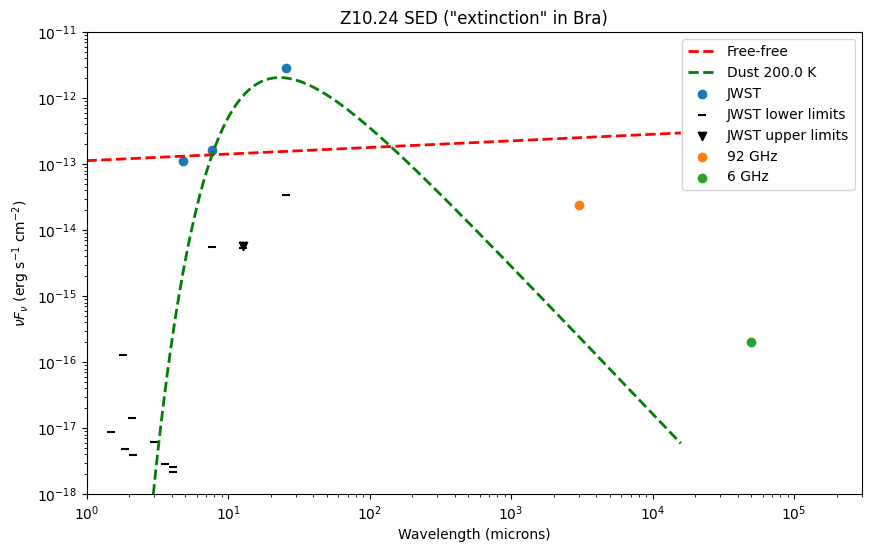

In [133]:
fig = plt.figure(figsize=(10, 6))
plt.plot(wavelength, S_ff*10**(-11.5), label=f"Free-free", color='r', lw=2, linestyle = '--')
plt.plot(wavelength, S_dust*10**10, label=f'Dust {T_d}', color='g', lw=2, linestyle = '--')
plt.scatter(wavelengths, nuFnu, label = 'JWST')

plt.scatter(wavelengths, jwst_lower_limits_nuFnu, marker='_', color='k', label='JWST lower limits')

plt.scatter(wavelengths, nuFnu_upper_limits, marker='v', color='k', label='JWST upper limits')

plt.scatter((3*u.mm).to(u.um).value, nuFnu_92ghz.value, label='92 GHz')
plt.scatter((freq_to_wav(6*u.GHz)).value, nuFnu_6ghz.value, label='6 GHz')


plt.title('Z10.24 SED ("extinction" in Bra)')

plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlim(1, 300000)
plt.ylim(10**(-18), 10**(-11))
plt.ylabel(r'$\nu F_\nu$ (erg s$^{-1}$ cm$^{-2}$)')
plt.xlabel('Wavelength (microns)')

In [65]:
def get_SI(flux1, flux2, freq1, freq2):

    freq1 = (freq1.to(u.Hz)).value
    freq2 = (freq2.to(u.Hz)).value
    one = (np.log((flux1).value)-np.log((flux2).value))
    two = (np.log(freq1)-np.log(freq2))
    SI = one/two
    
    return SI

In [66]:
get_SI(2.652939222753e-2*u.Jy, 3.352606436238e-3*u.Jy, 92*u.GHz, 6*u.GHz)

0.7576897876646974

In [120]:
src2 = cat[(cat['id_f480m'] == 310817) & (cat['id_f405n'] == 40809)][0]
cross_match_with_src(src2)

No match in F1280W catalog for source 310817


([0.0010894201827629743, masked, 0.012093290379911671],
 [masked, masked, masked])

In [124]:
freqs = (c.c / (np.array(wavelengths)*u.um)).to(u.Hz)
nuFnu = (get_jy(src2)[0]*u.Jy * freqs).to(u.erg/u.s/u.cm**2)

miri_1280_hardcoded_upper = (8.610597991943e+1*u.MJy/u.sr * pixel_area_1280).to(u.Jy).value
jy_upper_limits = get_jy(src2)[1]
jy_upper_limits[-2] = miri_1280_hardcoded_upper
nuFnu_upper_limits = (jy_upper_limits*u.Jy * freqs).to(u.erg/u.s/u.cm**2)

No match in F1280W catalog for source 310817
No match in F1280W catalog for source 310817
No match in F1280W catalog for source 310817
No match in F1280W catalog for source 310817


/blue/adamginsburg/nbudaiev/python_env/JWST_SgrB2/lib/python3.12/site-packages/astropy/units/quantity.py:544: UserWarning: Warning: converting a masked element to nan.
  value = np.array(


In [125]:
nuFnu_92ghz = (1.119052642025e-3*u.Jy * 92*u.GHz).to(u.erg/u.s/u.cm**2)
nuFnu_6ghz = (3.078077221289e-3*u.Jy * 6*u.GHz).to(u.erg/u.s/u.cm**2)

Text(0.5, 0, 'Wavelength (microns)')

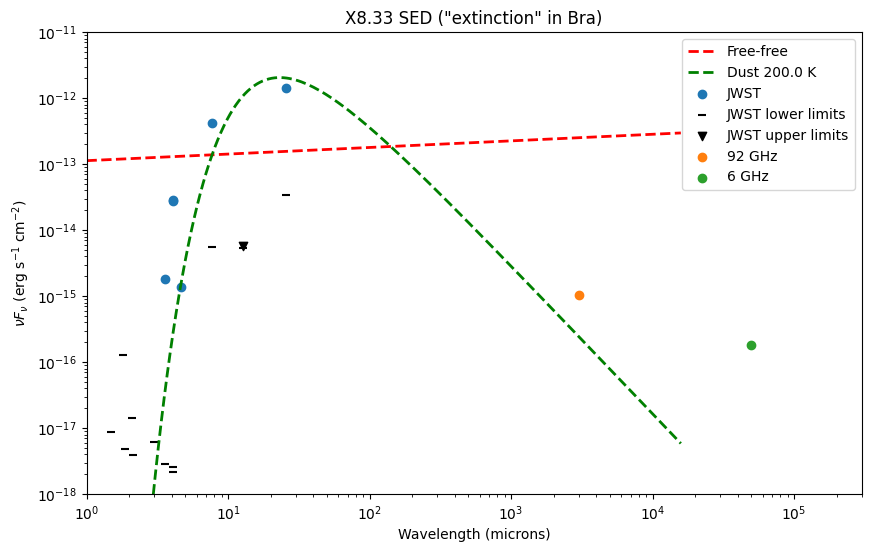

In [126]:
fig = plt.figure(figsize=(10, 6))
plt.plot(wavelength, S_ff*10**(-11.5), label=f"Free-free", color='r', lw=2, linestyle = '--')
plt.plot(wavelength, S_dust*10**10, label=f'Dust {T_d}', color='g', lw=2, linestyle = '--')
plt.scatter(wavelengths, nuFnu, label = 'JWST')

plt.scatter(wavelengths, jwst_lower_limits_nuFnu, marker='_', color='k', label='JWST lower limits')

plt.scatter(wavelengths, nuFnu_upper_limits, marker='v', color='k', label='JWST upper limits')

plt.scatter((3*u.mm).to(u.um).value, nuFnu_92ghz.value, label='92 GHz')
plt.scatter((freq_to_wav(6*u.GHz)).value, nuFnu_6ghz.value, label='6 GHz')


plt.title('X8.33 SED ("extinction" in Bra)')

plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlim(1, 300000)
plt.ylim(10**(-18), 10**(-11))
plt.ylabel(r'$\nu F_\nu$ (erg s$^{-1}$ cm$^{-2}$)')
plt.xlabel('Wavelength (microns)')

In [135]:
get_SI(3.078077221289e-3*u.Jy, 1.119052642025e-3*u.Jy, 92*u.GHz, 6*u.GHz, )

0.3706270560656999

In [139]:
src3 = cat[(cat['id_f480m'] == 51008) & (cat['id_f405n'] == 61142)][0]
cross_match_with_src(src3)

freqs = (c.c / (np.array(wavelengths)*u.um)).to(u.Hz)
nuFnu = (get_jy(src3)[0]*u.Jy * freqs).to(u.erg/u.s/u.cm**2)

#miri_1280_hardcoded_upper = (8.610597991943e+1*u.MJy/u.sr * pixel_area_1280).to(u.Jy).value
jy_upper_limits = get_jy(src3)[1]
#jy_upper_limits[-2] = miri_1280_hardcoded_upper
nuFnu_upper_limits = (jy_upper_limits*u.Jy * freqs).to(u.erg/u.s/u.cm**2)

/blue/adamginsburg/nbudaiev/python_env/JWST_SgrB2/lib/python3.12/site-packages/astropy/units/quantity.py:544: UserWarning: Warning: converting a masked element to nan.
  value = np.array(


In [143]:
nuFnu_92ghz = (6e-5 * u.Jy * 92*u.GHz).to(u.erg/u.s/u.cm**2)
nuFnu_6ghz = (2e-4*u.Jy * 6*u.GHz).to(u.erg/u.s/u.cm**2)

Text(0.5, 0, 'Wavelength (microns)')

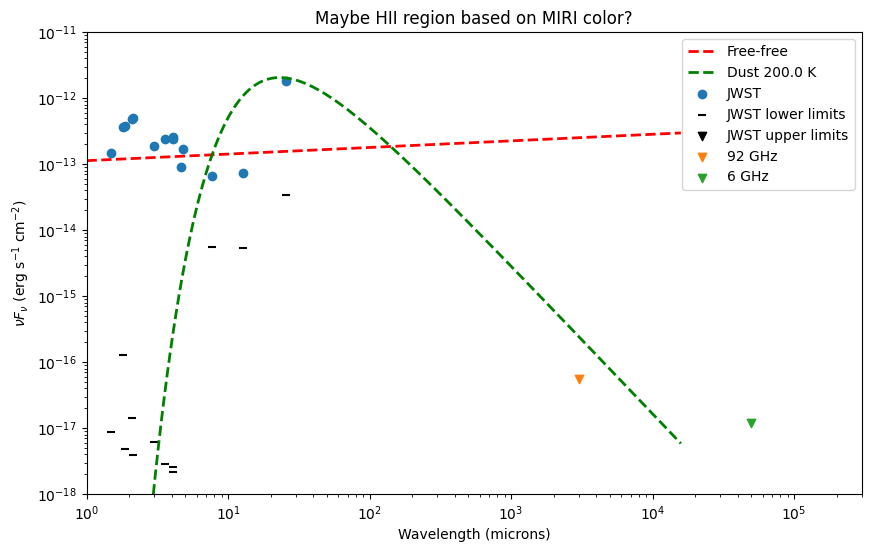

In [145]:
fig = plt.figure(figsize=(10, 6))
plt.plot(wavelength, S_ff*10**(-11.5), label=f"Free-free", color='r', lw=2, linestyle = '--')
plt.plot(wavelength, S_dust*10**10, label=f'Dust {T_d}', color='g', lw=2, linestyle = '--')
plt.scatter(wavelengths, nuFnu, label = 'JWST')

plt.scatter(wavelengths, jwst_lower_limits_nuFnu, marker='_', color='k', label='JWST lower limits')

plt.scatter(wavelengths, nuFnu_upper_limits, marker='v', color='k', label='JWST upper limits')

plt.scatter((3*u.mm).to(u.um).value, nuFnu_92ghz.value, label='92 GHz', marker = 'v')
plt.scatter((freq_to_wav(6*u.GHz)).value, nuFnu_6ghz.value, label='6 GHz', marker = 'v')


plt.title('Maybe HII region based on MIRI color?')

plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlim(1, 300000)
plt.ylim(10**(-18), 10**(-11))
plt.ylabel(r'$\nu F_\nu$ (erg s$^{-1}$ cm$^{-2}$)')
plt.xlabel('Wavelength (microns)')

In [ ]:
cat[(cat['id_f480m'] == )]

skycoord_ref,skycoord_ref_filtername,sep_f480m,id_f480m,skycoord_f480m,x_f480m,y_f480m,flux_f480m,passno_f480m,dx_f480m,dy_f480m,dflux_f480m,qf_f480m,rchi2_f480m,fracflux_f480m,fluxlbs_f480m,dfluxlbs_f480m,fwhm_f480m,spread_model_f480m,dspread_model_f480m,fluxiso_f480m,xiso_f480m,yiso_f480m,flags_f480m,sky_f480m,mask_f480m,dra_f480m,ddec_f480m,flux_jy_f480m,eflux_jy_f480m,mag_ab_f480m,emag_ab_f480m,near_saturated_f480m_f480m,replaced_saturated_f480m,sep_f466n,id_f466n,skycoord_f466n,x_f466n,y_f466n,flux_f466n,passno_f466n,dx_f466n,dy_f466n,dflux_f466n,qf_f466n,rchi2_f466n,fracflux_f466n,fluxlbs_f466n,dfluxlbs_f466n,fwhm_f466n,spread_model_f466n,dspread_model_f466n,fluxiso_f466n,xiso_f466n,yiso_f466n,flags_f466n,sky_f466n,mask_f466n,dra_f466n,ddec_f466n,flux_jy_f466n,eflux_jy_f466n,mag_ab_f466n,emag_ab_f466n,near_saturated_f466n_f466n,replaced_saturated_f466n,sep_f410m,id_f410m,skycoord_f410m,x_f410m,y_f410m,flux_f410m,passno_f410m,dx_f410m,dy_f410m,dflux_f410m,qf_f410m,rchi2_f410m,fracflux_f410m,fluxlbs_f410m,dfluxlbs_f410m,fwhm_f410m,spread_model_f410m,dspread_model_f410m,fluxiso_f410m,xiso_f410m,yiso_f410m,flags_f410m,sky_f410m,mask_f410m,dra_f410m,ddec_f410m,flux_jy_f410m,eflux_jy_f410m,mag_ab_f410m,emag_ab_f410m,near_saturated_f410m_f410m,replaced_saturated_f410m,sep_f405n,id_f405n,skycoord_f405n,x_f405n,y_f405n,flux_f405n,passno_f405n,dx_f405n,dy_f405n,dflux_f405n,qf_f405n,rchi2_f405n,fracflux_f405n,fluxlbs_f405n,dfluxlbs_f405n,fwhm_f405n,spread_model_f405n,dspread_model_f405n,fluxiso_f405n,xiso_f405n,yiso_f405n,flags_f405n,sky_f405n,mask_f405n,dra_f405n,ddec_f405n,flux_jy_f405n,eflux_jy_f405n,mag_ab_f405n,emag_ab_f405n,near_saturated_f405n_f405n,replaced_saturated_f405n,sep_f360m,id_f360m,skycoord_f360m,x_f360m,y_f360m,flux_f360m,passno_f360m,dx_f360m,dy_f360m,dflux_f360m,qf_f360m,rchi2_f360m,fracflux_f360m,fluxlbs_f360m,dfluxlbs_f360m,fwhm_f360m,spread_model_f360m,dspread_model_f360m,fluxiso_f360m,xiso_f360m,yiso_f360m,flags_f360m,sky_f360m,mask_f360m,dra_f360m,ddec_f360m,flux_jy_f360m,eflux_jy_f360m,mag_ab_f360m,emag_ab_f360m,near_saturated_f360m_f360m,replaced_saturated_f360m,sep_f300m,id_f300m,skycoord_f300m,x_f300m,y_f300m,flux_f300m,passno_f300m,dx_f300m,dy_f300m,dflux_f300m,qf_f300m,rchi2_f300m,fracflux_f300m,fluxlbs_f300m,dfluxlbs_f300m,fwhm_f300m,spread_model_f300m,dspread_model_f300m,fluxiso_f300m,xiso_f300m,yiso_f300m,flags_f300m,sky_f300m,mask_f300m,dra_f300m,ddec_f300m,flux_jy_f300m,eflux_jy_f300m,mag_ab_f300m,emag_ab_f300m,near_saturated_f300m_f300m,replaced_saturated_f300m,sep_f212n,id_f212n,skycoord_f212n,x_f212n,y_f212n,flux_f212n,passno_f212n,dx_f212n,dy_f212n,dflux_f212n,qf_f212n,rchi2_f212n,fracflux_f212n,fluxlbs_f212n,dfluxlbs_f212n,fwhm_f212n,spread_model_f212n,dspread_model_f212n,fluxiso_f212n,xiso_f212n,yiso_f212n,flags_f212n,sky_f212n,mask_f212n,dra_f212n,ddec_f212n,flux_jy_f212n,eflux_jy_f212n,mag_ab_f212n,emag_ab_f212n,near_saturated_f212n_f212n,replaced_saturated_f212n,sep_f210m,id_f210m,skycoord_f210m,x_f210m,y_f210m,flux_f210m,passno_f210m,dx_f210m,dy_f210m,dflux_f210m,qf_f210m,rchi2_f210m,fracflux_f210m,fluxlbs_f210m,dfluxlbs_f210m,fwhm_f210m,spread_model_f210m,dspread_model_f210m,fluxiso_f210m,xiso_f210m,yiso_f210m,flags_f210m,sky_f210m,mask_f210m,dra_f210m,ddec_f210m,flux_jy_f210m,eflux_jy_f210m,mag_ab_f210m,emag_ab_f210m,near_saturated_f210m_f210m,replaced_saturated_f210m,sep_f187n,id_f187n,skycoord_f187n,x_f187n,y_f187n,flux_f187n,passno_f187n,dx_f187n,dy_f187n,dflux_f187n,qf_f187n,rchi2_f187n,fracflux_f187n,fluxlbs_f187n,dfluxlbs_f187n,fwhm_f187n,spread_model_f187n,dspread_model_f187n,fluxiso_f187n,xiso_f187n,yiso_f187n,flags_f187n,sky_f187n,mask_f187n,dra_f187n,ddec_f187n,flux_jy_f187n,eflux_jy_f187n,mag_ab_f187n,emag_ab_f187n,near_saturated_f187n_f187n,replaced_saturated_f187n,sep_f182m,id_f182m,skycoord_f182m,x_f182m,y_f182m,flux_f182m,passno_f182m,dx_f182m,dy_f182m,dflux_f182m,qf_f182m,rchi2_f182m,fracflux_f182m,fluxlbs_f182m,dfluxlbs_f182m,fwhm_f182m,spread_model_f182m,dspread_mod

In [ ]:
get_jy(src4)[0] # verified that the correct source was matched in the 25um catalog

[3.1336208e-06,
 0.00010865112,
 0.00013402327,
 0.00046905273,
 0.00053465966,
 1.6119442e-05,
 0.0005184131,
 0.0019391886,
 0.00169187,
 0.00012548974,
 0.0014493094,
 0.0005384042940212139,
 7.446296246513898e-05,
 0.0021341018629170315]

In [167]:

src4 = cat[(cat['id_f480m'] == 73468) & (cat['id_f405n'] == 87793)][0]

freqs = (c.c / (np.array(wavelengths)*u.um)).to(u.Hz)
nuFnu = (get_jy(src4)[0]*u.Jy * freqs).to(u.erg/u.s/u.cm**2)

#miri_1280_hardcoded_upper = (8.610597991943e+1*u.MJy/u.sr * pixel_area_1280).to(u.Jy).value
jy_upper_limits = get_jy(src4)[1]
#jy_upper_limits[-2] = miri_1280_hardcoded_upper
nuFnu_upper_limits = (jy_upper_limits*u.Jy * freqs).to(u.erg/u.s/u.cm**2)

In [168]:
nuFnu_92ghz = (6e-5 * u.Jy * 92*u.GHz).to(u.erg/u.s/u.cm**2)
nuFnu_6ghz = (2e-4*u.Jy * 6*u.GHz).to(u.erg/u.s/u.cm**2)

Text(0.5, 0, 'Wavelength (microns)')

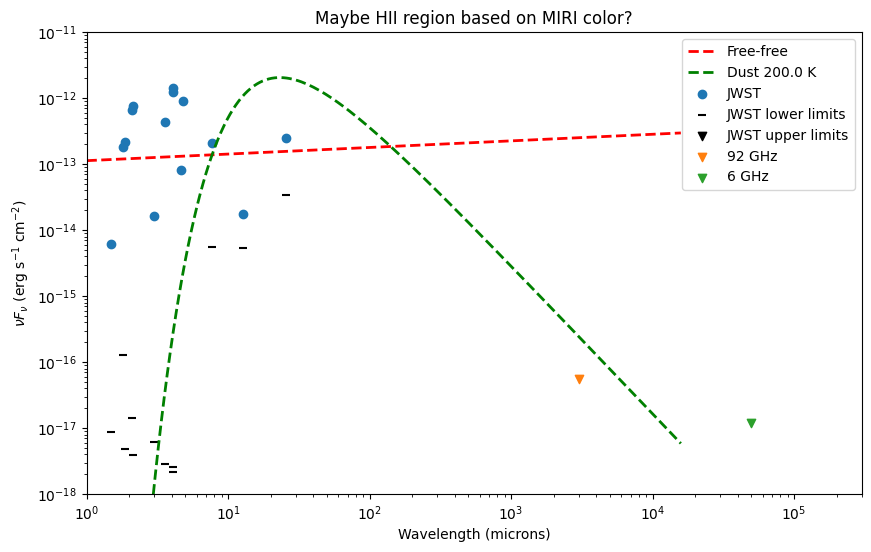

In [169]:
fig = plt.figure(figsize=(10, 6))
plt.plot(wavelength, S_ff*10**(-11.5), label=f"Free-free", color='r', lw=2, linestyle = '--')
plt.plot(wavelength, S_dust*10**10, label=f'Dust {T_d}', color='g', lw=2, linestyle = '--')
plt.scatter(wavelengths, nuFnu, label = 'JWST')

plt.scatter(wavelengths, jwst_lower_limits_nuFnu, marker='_', color='k', label='JWST lower limits')

plt.scatter(wavelengths, nuFnu_upper_limits, marker='v', color='k', label='JWST upper limits')

plt.scatter((3*u.mm).to(u.um).value, nuFnu_92ghz.value, label='92 GHz', marker = 'v')
plt.scatter((freq_to_wav(6*u.GHz)).value, nuFnu_6ghz.value, label='6 GHz', marker = 'v')


plt.title('Maybe HII region based on MIRI color?')

plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlim(1, 300000)
plt.ylim(10**(-18), 10**(-11))
plt.ylabel(r'$\nu F_\nu$ (erg s$^{-1}$ cm$^{-2}$)')
plt.xlabel('Wavelength (microns)')

In [170]:
src5 = cat[(cat['id_f480m'] == 411553) & (cat['id_f405n'] == 79331)][0]

freqs = (c.c / (np.array(wavelengths)*u.um)).to(u.Hz)
nuFnu = (get_jy(src5)[0]*u.Jy * freqs).to(u.erg/u.s/u.cm**2)

miri_1280_hardcoded_upper = (4.062288513184e+2*u.MJy/u.sr * pixel_area_1280).to(u.Jy).value
miri_2550_hardcoded_upper = (3.688127685547e+3*u.MJy/u.sr * pixel_area_1280).to(u.Jy).value
jy_upper_limits = get_jy(src5)[1]
jy_upper_limits[-2] = miri_1280_hardcoded_upper
jy_upper_limits[-1] = miri_2550_hardcoded_upper
nuFnu_upper_limits = (jy_upper_limits*u.Jy * freqs).to(u.erg/u.s/u.cm**2)

No match in F1280W catalog for source 411553
No match in F2550W catalog for source 411553
No match in F1280W catalog for source 411553
No match in F2550W catalog for source 411553
No match in F1280W catalog for source 411553
No match in F2550W catalog for source 411553
No match in F1280W catalog for source 411553
No match in F2550W catalog for source 411553


Text(0.5, 0, 'Wavelength (microns)')

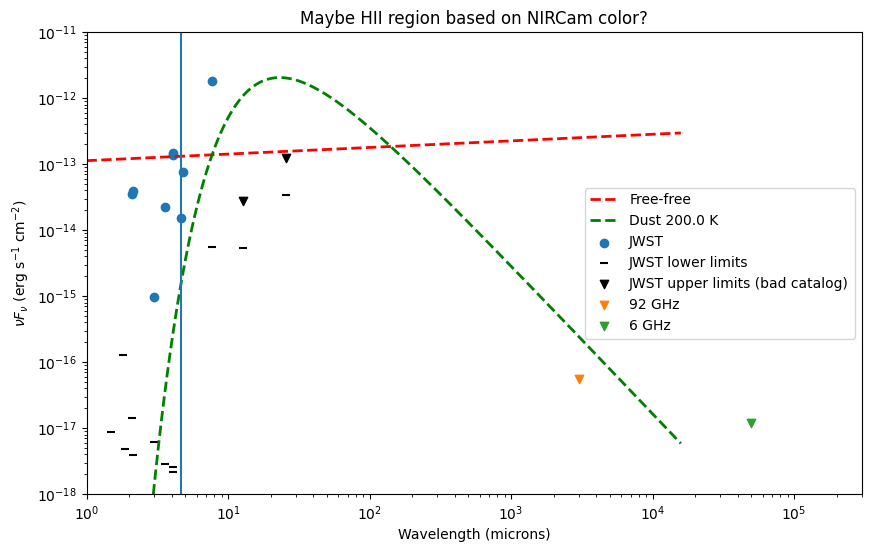

In [171]:
fig = plt.figure(figsize=(10, 6))
plt.plot(wavelength, S_ff*10**(-11.5), label=f"Free-free", color='r', lw=2, linestyle = '--')
plt.plot(wavelength, S_dust*10**10, label=f'Dust {T_d}', color='g', lw=2, linestyle = '--')
plt.scatter(wavelengths, nuFnu, label = 'JWST')

plt.scatter(wavelengths, jwst_lower_limits_nuFnu, marker='_', color='k', label='JWST lower limits')

plt.scatter(wavelengths, nuFnu_upper_limits, marker='v', color='k', label='JWST upper limits (bad catalog)')

plt.scatter((3*u.mm).to(u.um).value, nuFnu_92ghz.value, label='92 GHz', marker = 'v')
plt.scatter((freq_to_wav(6*u.GHz)).value, nuFnu_6ghz.value, label='6 GHz', marker = 'v')

plt.axvline(4.66)
plt.title('Maybe HII region based on NIRCam color?')

plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlim(1, 300000)
plt.ylim(10**(-18), 10**(-11))
plt.ylabel(r'$\nu F_\nu$ (erg s$^{-1}$ cm$^{-2}$)')
plt.xlabel('Wavelength (microns)')

In [172]:

src6 = cat[(cat['id_f480m'] == 52059) & (cat['id_f405n'] == 62404)][0]

freqs = (c.c / (np.array(wavelengths)*u.um)).to(u.Hz)
nuFnu = (get_jy(src6)[0]*u.Jy * freqs).to(u.erg/u.s/u.cm**2)

miri_770_hardcoded_upper = (2.757945556641e+2 *u.MJy/u.sr * pixel_area_770).to(u.Jy).value
miri_1280_hardcoded_upper = (1.345265655518e+2*u.MJy/u.sr * pixel_area_1280).to(u.Jy).value
miri_2550_hardcoded_upper = (4.119388671875e+3*u.MJy/u.sr * pixel_area_1280).to(u.Jy).value
jy_upper_limits = get_jy(src5)[1]
jy_upper_limits[-3] = miri_770_hardcoded_upper
jy_upper_limits[-2] = miri_1280_hardcoded_upper
jy_upper_limits[-1] = miri_2550_hardcoded_upper
nuFnu_upper_limits = (jy_upper_limits*u.Jy * freqs).to(u.erg/u.s/u.cm**2)

No match in F770W catalog for source 52059
No match in F1280W catalog for source 52059
No match in F2550W catalog for source 52059
No match in F770W catalog for source 52059
No match in F1280W catalog for source 52059
No match in F2550W catalog for source 52059
No match in F1280W catalog for source 411553
No match in F2550W catalog for source 411553
No match in F1280W catalog for source 411553
No match in F2550W catalog for source 411553


/blue/adamginsburg/nbudaiev/python_env/JWST_SgrB2/lib/python3.12/site-packages/astropy/units/quantity.py:544: UserWarning: Warning: converting a masked element to nan.
  value = np.array(


In [173]:

nuFnu_92ghz = (1.241483405465e-4 * u.Jy * 92*u.GHz).to(u.erg/u.s/u.cm**2)
nuFnu_6ghz = (6.637058104388e-4*u.Jy * 6*u.GHz).to(u.erg/u.s/u.cm**2)

Text(0.5, 0, 'Wavelength (microns)')

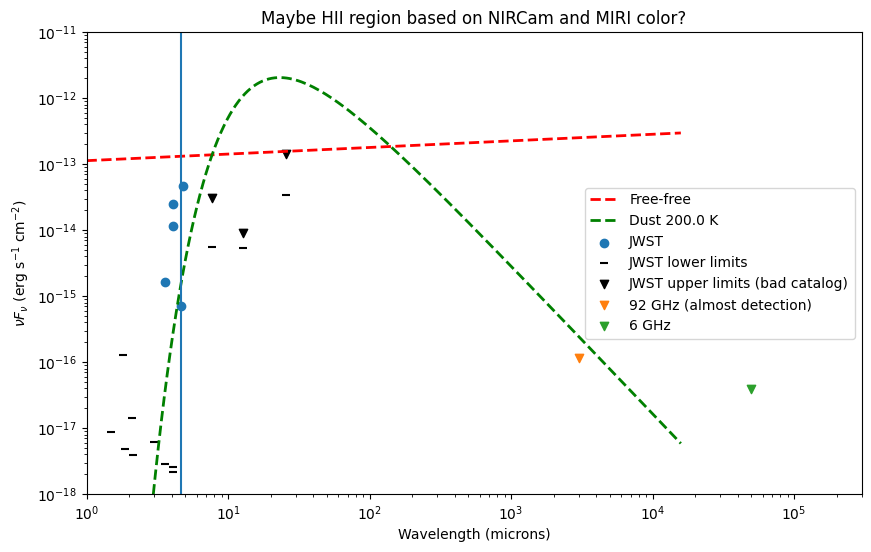

In [175]:
fig = plt.figure(figsize=(10, 6))
plt.plot(wavelength, S_ff*10**(-11.5), label=f"Free-free", color='r', lw=2, linestyle = '--')
plt.plot(wavelength, S_dust*10**10, label=f'Dust {T_d}', color='g', lw=2, linestyle = '--')
plt.scatter(wavelengths, nuFnu, label = 'JWST')

plt.scatter(wavelengths, jwst_lower_limits_nuFnu, marker='_', color='k', label='JWST lower limits')

plt.scatter(wavelengths, nuFnu_upper_limits, marker='v', color='k', label='JWST upper limits (bad catalog)')

plt.scatter((3*u.mm).to(u.um).value, nuFnu_92ghz.value, label='92 GHz (almost detection)', marker = 'v')
plt.scatter((freq_to_wav(6*u.GHz)).value, nuFnu_6ghz.value, label='6 GHz', marker = 'v')

plt.axvline(4.66)
plt.title('Maybe HII region based on NIRCam and MIRI color?')

plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlim(1, 300000)
plt.ylim(10**(-18), 10**(-11))
plt.ylabel(r'$\nu F_\nu$ (erg s$^{-1}$ cm$^{-2}$)')
plt.xlabel('Wavelength (microns)')